In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import expon

### Generate Barabasi - Albert Network

In [2]:
# Returns an Barabasi-Albert network graph in an adjacency matrix format.
def BarabasiAlbert (m = 4, N_initial = 4, N = 100):
    if(m > N_initial):
        return
    
    adj_matrix = np.zeros((N_initial,N_initial))
    
    for i in range(N - N_initial):
        neighbours = choose_neighbour(m, adj_matrix)
        adj_matrix = add_node(adj_matrix)
        for k in range(len(adj_matrix)):
            if k in neighbours:
                adj_matrix[i][k] = 1
                adj_matrix[k][i] = 1
    return adj_matrix  

In [3]:
# Generates the Probability of each node in the for of cumulative probility
def generate_cumulative_probability(adj_matrix):
    e = adj_matrix.sum()
    N = len(adj_matrix)
    probability = []
    
    if e < 1:
        probability = [(1.0/N) ]*N
        prev = 0
        for i,j in enumerate(probability):
            probability[i] = probability[i] + prev
            prev = probability[i]   
    
    else:
        for i in range(N):
            degree = adj_matrix[i].sum()
            P_i = degree / (2*e)

            if i > 0:
                P_i += probability[i-1]   

            probability.append(P_i)
            
    return probability   

In [4]:
# Chooses m number of new neighbours for the new node.
# Based on the probabilities of each node and a random number generated in the range (0,1) based on gaussian probability 
def choose_neighbour(m, adj_matrix):
    probability = generate_cumulative_probability(adj_matrix)
    neighbours = []
    
    e = 0
    while(e < m):
        random = np.random.random_sample()
        index = -1
        if random <= probability[0]:
            index = 0
        
        else:
            for j in range(1, len(probability)):
                if random > probability[j-1] and random <= probability[j]:
                    index = j
                    
        if index not in neighbours:      
            neighbours.append(index)
            e += 1
    return neighbours         

In [5]:
# Adds a new column and row to the adjacency matrix
def add_node(adj_matrix):
    x = np.zeros((1, len(adj_matrix)))
    y = np.zeros((1 + len(adj_matrix), 1))
    adj_matrix = np.hstack((np.vstack((adj_matrix, x)), y))
    return adj_matrix

### Degree Distribution

In [6]:
graph = BarabasiAlbert()
degree_distribution = graph.sum(axis = 1)

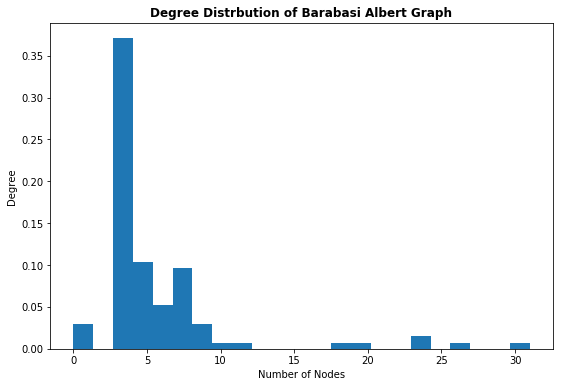

In [18]:
fig , ax1 = plt.subplots(1, figsize = (9,6))
ax1.hist(degree_distribution, density = True, bins = 'auto', )
ax1.set_ylabel('Degree')
ax1.set_xlabel('Number of Nodes')
ax1.set_title('Degree Distrbution of Barabasi Albert Graph', fontweight='bold')
fig.show()

### Exponential Distribution fitting

In [8]:
# The parameter lambda is calcualted according the the MLE equation derived in report
l = degree_distribution.sum()/len(degree_distribution)

# Exponential distribution fitting using expon package
loc, scale_fit = expon.fit(degree_distribution, floc=0)
    
l , scale_fit
x = np.linspace(expon.ppf(0.01, scale = scale_fit ), expon.ppf(0.99, scale = scale_fit), 100)


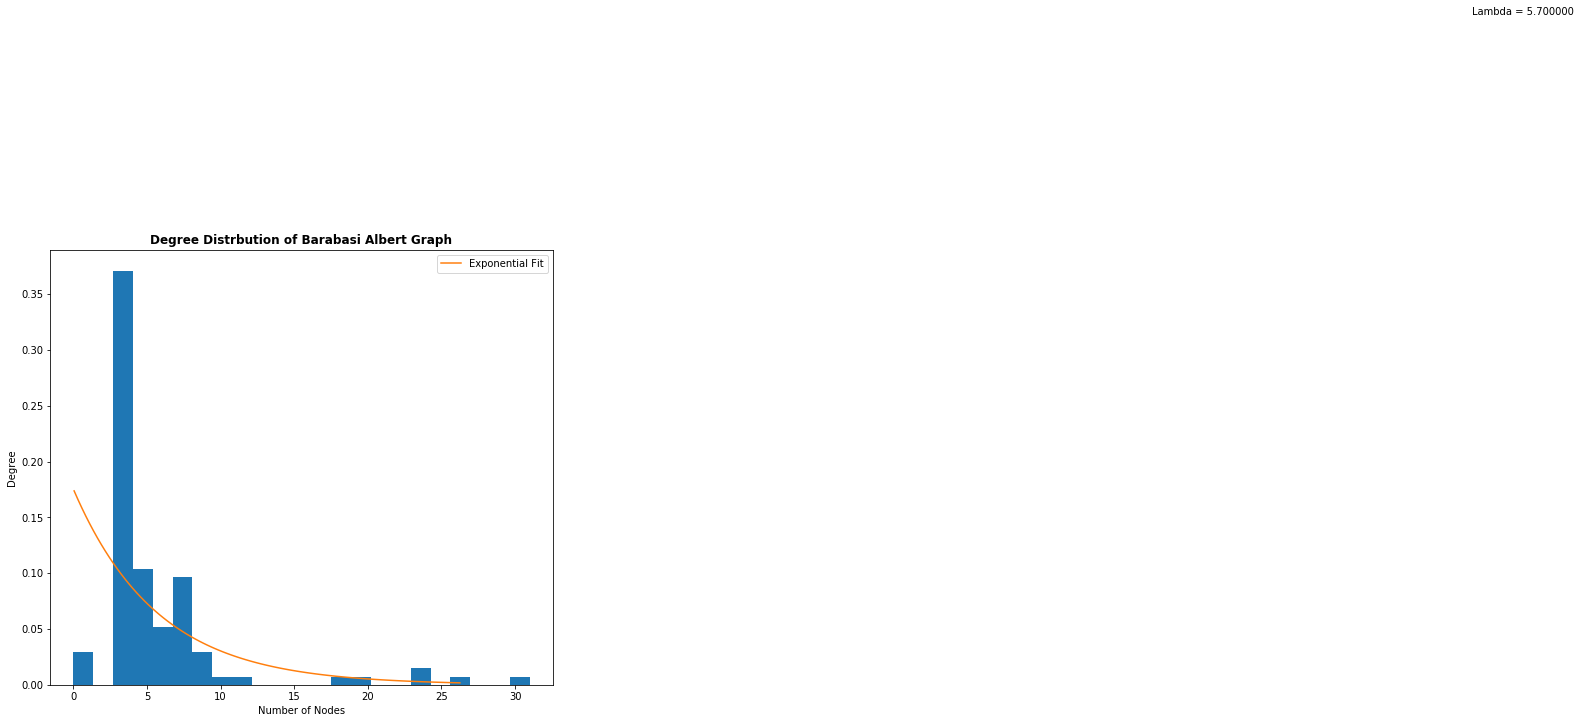

In [17]:
fig , ax1 = plt.subplots(1, figsize = (9,8))
ax1.hist(degree_distribution, density = True, bins = 'auto', )
ax1.set_ylabel('Degree')
ax1.set_xlabel('Number of Nodes')
ax1.set_title('Degree Distrbution of Barabasi Albert Graph', fontweight='bold')
ax1.plot(x, expon.pdf(x, scale = scale_fit), label = 'Exponential Fit')
ax1.text(95,0.6,'Lambda = %f'%(scale_fit))
ax1.legend()
fig.show()

### Linear Least Square Fitting of Log-Log distribution

In [10]:
y = expon.pdf(x, scale = scale_fit)
xlog = np.log(x)
ylog = np.log(y)

A = np.vstack((xlog, np.ones(len(xlog))))
A = np.transpose(A)

log_C, log_gamma = np.linalg.lstsq(A, y, rcond=None)[0]

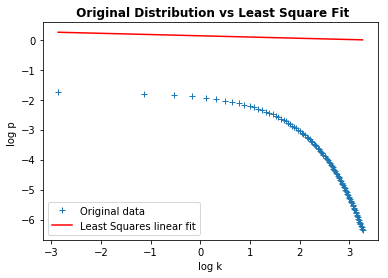

In [11]:
plt.figure()
plt.title(" Original Distribution vs Least Square Fit", fontweight ='bold')
plt.plot(xlog, ylog, '+', label = 'Original data')
plt.plot(xlog, log_C*xlog + log_gamma, color ='r', label = 'Least Squares linear fit')
plt.ylabel("log p ")
plt.xlabel('log k')
plt.legend()
plt.show()

### Power Law Fitting

In [16]:
import powerlaw
results = powerlaw.Fit(degree_distribution)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
